# K-Means Clustering

In [27]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="yoyo-application", timeout=3)
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='robitalhazmi', api_key='HRbP9htQtG87qcOHaRml')

In [68]:
df = pd.read_csv('./data/clustering_result.csv', index_col=0)
df.shape
# df['text'] = df['username'] + '<br>' + df['text'] + '<br>' + df['time'] + ' - ' + df['date'] + ' dari ' + df['lokasi']

(6787, 13)

In [75]:
test = df.drop(df[df['province'] == 'CDMX'].index)
data = test.drop(df[df['province'] == 'Johor'].index)
data.to_csv('./clustering_result.csv')

In [42]:
# index = 4488
# for idx, (lat, long) in enumerate(zip(df['latitude'][index:], df['longitude'][index:])):
#     address = geolocator.reverse(str(lat) + "," + str(long)).raw['address']
#     if 'state' in address:
#         state = address['state']
#     else:
#         state = address['city']
#     print(index)
#     print(state)
#     df['province'][index] = state
#     index = index+1

In [44]:
df[df['province'] == 'Johor']

,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude,result,cluster_result,province
3156,@ibnhakem,2018-08-01,19:23,@ibnhakem<br>@ibnhakem<br>@ibnhakem<br>@ibnhak...,1024631604231061505,01e32bf99cca9510,Parit Jawa,Parit Jawa Johor,102.694298,1.994829,sakit perut tangan cedok petang,2,Johor
3264,@ibnhakem,2018-08-07,23:55,@ibnhakem<br>@ibnhakem<br>@ibnhakem<br>@ibnhak...,1026874502171451392,01e32bf99cca9510,Parit Jawa,Parit Jawa Johor,102.694298,1.994829,tangan mihun kari petang sakit perut malam waaaa,2,Johor


'Babel'

In [2]:
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.cluster import KMeans

from time import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt; 
plt.rcdefaults()

# Data from Preprocessing Result

In [ ]:
data = pd.read_csv('./data/preprocessing_data.csv', index_col=0)
data = data.replace(np.nan, '', regex=True)
data.head()

In [9]:
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

# set of documents
corpora = data.loc[:,'result'].tolist()

# instantiate the vectorizer object
cvec = CountVectorizer(lowercase=False)

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpora)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
tdm = wm2df(wm, tokens)

In [10]:
tdm.head()

,aa,aaa,aaaa,aaaaaa,aaaaaaaaaa,aaaaaaaaaaah,aaaarghhh,aaah,aaahahahaha,aah,...,zionis,zona,zone,zonk,zuhur,zul,zum,zus,zz,zzzz
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
corpora = data.loc[:,'result'].tolist()
len(corpora)

6787

In [66]:
new_tdm = tdm.sum(0).to_frame('freq')
new_tdm[new_tdm['freq'] > 100].sort_values(by=['freq'], ascending=False)

,freq
mulas,2760
perut,2663
sakit,2343
gue,1168
diare,1070
makan,1047
aja,995
sidi,867
yg,764
mencret,684


# K-Means Clustering with Tfidf Vectorizer

In [6]:
# range_cluster = 11
# wcss = []
# for cluster in range(2, range_cluster):
#     print("Cluster " + str(cluster))
#     print('#######################################################################')
#     print("Extracting features from the training dataset using a sparse vectorizer")
#     t0 = time()
#     vectorizer = TfidfVectorizer(max_df=0.5, max_features=100, min_df=85, use_idf=True)
#     X = vectorizer.fit_transform(corpora)

#     print("done in %fs" % (time() - t0))
#     print("n_samples: %d, n_features: %d" % X.shape)
#     print()

#     km = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=1, verbose=False)

#     print("Clustering sparse data with %s" % km)
#     t0 = time()
#     km.fit(X)
#     wcss.append(km.inertia_)
#     print("done in %0.3fs" % (time() - t0))
#     print()

#     print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

#     print()

#     print("Top terms per cluster:")
#     order_centroids = km.cluster_centers_.argsort()[:, ::-1]

#     terms = vectorizer.get_feature_names()
#     for i in range(cluster):
#         print("Cluster %d:" % i, end='')
#         for ind in order_centroids[i, :10]:
#             print(' %s' % terms[ind], end='')
#         print()
#     print()

In [7]:
# tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
# tfidf.shape

In [8]:
# plt.plot(range(2, range_cluster), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# K-Means Clustering with CountVectorizer

In [31]:
range_cluster = 11
wcss = []
for cluster in range(2, range_cluster):
    print("Cluster " + str(cluster))
    print('#######################################################################')
    print("Extracting features from the training dataset using a sparse vectorizer")
    t0 = time()
    vectorizer = CountVectorizer(min_df=85)
#     vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpora)

    print("done in %fs" % (time() - t0))
    print("n_samples: %d, n_features: %d" % X.shape)
    print()

    km = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=1, verbose=False)

    print("Clustering sparse data with %s" % km)
    t0 = time()
    km.fit(X)
    wcss.append(km.inertia_)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_))

    print()

    print("Top terms per cluster:")
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(cluster):
        print("Cluster %s:" % str(i+1), end='')
        for ind in order_centroids[i, :15]:
            print(' %s' % terms[ind], end='')
        print()
    print()

Cluster 2
#######################################################################
Extracting features from the training dataset using a sparse vectorizer
done in 0.121930s
n_samples: 6787, n_features: 101

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 0.293s

Silhouette Coefficient: 0.137

Top terms per cluster:
Cluster 1: sakit perut makan gue aja yg sidi ya kalo bikin uda ampe banget jam pagi
Cluster 2: mulas diare gue aja mencret sidi makan perut yg uda ya kalo mules pagi banget

Cluster 3
#######################################################################
Extracting features from the training dataset using a sparse vectorizer
done in 0.219874s
n_samples: 6787, n_features: 101

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_j

Silhouette Coefficient: 0.096

Top terms per cluster:
Cluster 1: gue perut mulas sakit yg aja sidi uda makan tuju kalo pas banget jam ampe
Cluster 2: sakit perut aja gue ya sidi makan ampe bikin kalo yg uda jam pagi minum
Cluster 3: yg mulas sidi aja gue diare perut kalo tuju pagi sakit pas banget ya uda
Cluster 4: makan perut sakit pedas aja gue kalo yg sidi mulas uda diare langsung ya banget
Cluster 5: mulas kalo makan aja uda gue sidi ya abis pedas nih pagi pas minum ampe
Cluster 6: mencret aja makan ya sidi kalo uda gue minum yg nih ampe biar pas elu
Cluster 7: perut mulas aja banget sidi gue makan uda pagi jam ya sakit pas langsung minum
Cluster 8: mulas gue pagi aja sidi uda banget ya pas jam ampe ken tidur bangun langsung
Cluster 9: bikin mulas perut aja yg sidi gue pagi sakit uda kalo ya banget makan sarap
Cluster 10: diare mules aja sidi makan obat ya akibat gue tuberkulosis sakti uda minum yg bakteri



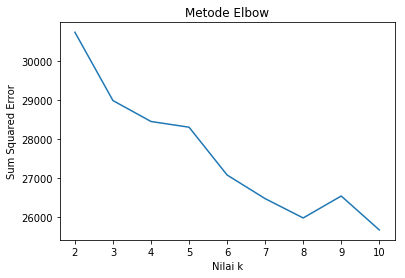

In [42]:
plt.plot(range(2, range_cluster), wcss)
plt.title('Metode Elbow')
plt.xlabel('Nilai k')
plt.ylabel('Sum Squared Error')
plt.show()

In [7]:
cluster = 5
wcss = []
print("Cluster " + str(cluster))
print('#######################################################################')
print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
vectorizer = CountVectorizer(min_df=85)
X = vectorizer.fit_transform(corpora)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

km = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=1, verbose=False)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
wcss.append(km.inertia_)
print("done in %0.3fs" % (time() - t0))
print()

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_))

print()

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(cluster):
    print("Cluster %s:" % str(i+1), end='')
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind], end='')
    print()
print()

Cluster 5
#######################################################################
Extracting features from the training dataset using a sparse vectorizer
done in 0.123949s
n_samples: 6787, n_features: 101

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 0.472s

Silhouette Coefficient: 0.116

Top terms per cluster:
Cluster 1: diare aja makan obat sidi yg ya uda gue kalo sakit tuju minum banget perut
Cluster 2: sidi mulas perut yg aja makan gue kalo pas mencret pagi uda ya jam mules
Cluster 3: sakit perut makan aja gue ya yg sidi bikin kalo ampe uda banget pagi jam
Cluster 4: mulas mencret perut aja makan mules gue yg uda ya pagi kalo bikin banget pas
Cluster 5: gue perut mulas makan sakit aja yg kalo uda tuju pedas sidi banget jam pas



In [19]:
cluster_result = []
for r in data['result']:
    cluster_result.append(km.predict(vectorizer.transform([r]))[0])

In [20]:
data['cluster_result'] = cluster_result
data.head()

,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude,result,cluster_result
0,@AbdulIkromMukti,2018-01-01,17:22,Ntah ini gaya apa. Nahan bersin Nahan mules M...,947775136970797056,2eb44917f4d6dddc,Cirebon Barat,Cirebon Barat Indonesia,108.539152,-6.719110,gaya cape bersin cape mulas muka kane muka xil...,1
1,@nengnurlaela21,2018-01-01,18:36,get well soon Kak Dori masih di Sukabumi ka...,947793618315522048,8b2c9342507e86d3,Baros,Baros Indonesia,106.928706,-6.946683,get well soon kak kalsium sidi bogor kak niat ...,0
2,@_sulistiyowati_,2018-01-01,19:57,Awalnya pening doang berhari-hari. Terus dema...,947813927059988481,dc83e4ea9c950d75,Labuhan Maringgai,Labuhan Maringgai Indonesia,105.811806,-5.342388,pening doang demam diare lemes kapar,1
3,@rundraj,2018-01-01,13:39,Sing seneng akeh sing mules merga mburi ngom...,947719008975015936,c4397d8c10325af5,Kasihan,Kasihan Indonesia,110.333619,-7.814739,singsing neng kah sing mulas papa bur terucuka...,1
4,@fitryfee3,2018-01-01,11:55,Maag kumat sejak kemarin hasilnya diare. Mul...,947692732536971264,420f122b6bea262c,Lemahabang,Lemahabang Indonesia,107.184287,-6.297686,gastritis kumat kemarin hasil diare mules plus...,1


In [3]:
cluster_df = pd.read_csv('https://raw.githubusercontent.com/robitalhazmi/final-project/master/data/clustering_result.csv', index_col=0)
cluster_df.head()

,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude,result,cluster_result
0,@AbdulIkromMukti,2018-01-01,17:22,Ntah ini gaya apa. Nahan bersin Nahan mules M...,947775136970797056,2eb44917f4d6dddc,Cirebon Barat,Cirebon Barat Indonesia,108.539152,-6.719110,gaya tahan bersin tahan mulas muka kane muka x...,3
1,@nengnurlaela21,2018-01-01,18:36,get well soon Kak Dori masih di Sukabumi ka...,947793618315522048,8b2c9342507e86d3,Baros,Baros Indonesia,106.928706,-6.946683,get well soon kak dor bogor kak niat samper ka...,2
2,@_sulistiyowati_,2018-01-01,19:57,Awalnya pening doang berhari-hari. Terus dema...,947813927059988481,dc83e4ea9c950d75,Labuhan Maringgai,Labuhan Maringgai Indonesia,105.811806,-5.342388,pening doang demam diare lemes kapar,4
3,@rundraj,2018-01-01,13:39,Sing seneng akeh sing mules merga mburi ngom...,947719008975015936,c4397d8c10325af5,Kasihan,Kasihan Indonesia,110.333619,-7.814739,sing neng kah sing mulas papa bur terucukan yo...,3
4,@fitryfee3,2018-01-01,11:55,Maag kumat sejak kemarin hasilnya diare. Mul...,947692732536971264,420f122b6bea262c,Lemahabang,Lemahabang Indonesia,107.184287,-6.297686,gastritis kumat kemarin hasil diare mulas plus...,3


In [51]:
cluster_df[cluster_df['text'].str.contains('oralit')]['cluster_result'].unique().tolist()

[3, 4, 0, 2]